# Transit: lightcurve extraction and analysis

In this notebook, we will focus on transits. A transit is the passage of a celestial body between a larger body and the observer. When such event appens, the perciveid luminosity of the larger object briefly goes down, which make it detectable by studying the lightcurve of the large body.

In this practical work, we will be interested in exoplanet transits. As of 1 january 2024, there are 5576 confirmed exoplanets (Wikipedia). Most of them can be detected by transit. It is possible to know in advance when it will be possible to observe a transit, using internet websites. In the following, we will use [Transit Finder](https://astro.swarthmore.edu/transits/transits.cgi), a website that allows users to select transits that satisfies mulitple constraints (depth, magnitude, sky location, etc.).\
\
The three main characteristics of transit are:
- The transit ***depth*** (how much light from the observed star is blocked by the transiting exoplanet)
- The transit ***duration***
- The planet's orbital ***period***

## 1. Find what transit you want to study

Go on [Transit Finder](https://astro.swarthmore.edu/transits/transits.cgi). Use the following parameters:
- ***Target list***: NASA Exoplanet Archive database
- ***Observatory***: 
    - latitude: 42.936389
    - longitude: 0.142778
    - timezone: UTC
- ***Date windows***:
    - base date: 01-30-2024
    - show transits for the next 3 days
- ***Depth***: 20
- Leave default value for the remaining parameters

Click ```Submit```

You should get a table listing 14 observable transits that satisfy our constraints. To select show only transit that are fully visible, drag the slider ```Show if visible transit % + baseline % > 200```. You now have only 4 remaining entries in the table. ***TOI-3757 b*** is quite interesting:
- Its depth is high with 32.9 ppt, which mean it should be easy to identify the drop in luminosity on its the lightcurve.
- Its duration is 1h55, with a suggested start en end observation time at 22h03 and 2h03 respectively, which is reasonnable for us.
- The moon should not be too problematic.

However, it has one major drawback: its magnitude of 14.8, which is a bit low. Tests should be performed to ensure the instrument can see at such magnitude.

# 2. Get the lightcurve of TOI-3757 b

We will use the [lightkurve](https://docs.lightkurve.org/) python package to anaylse our transit(s) data and determine the period of the transit. We can as well retreive data form knwon transits. It will be usefull to exerce ourselve on transit analysis.

First, import the lightkurve package

In [1]:
import lightkurve as lk
%matplotlib inline

Next, search an available pixel file for ***TOI-3757 b***. A target Pixel File contains movies of the pixel data centered on a single target star.

In [2]:
pixelfile = lk.search_targetpixelfile("TOI-3757 b")
pixelfile

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 59,2022,SPOC,120,445751830,0.0
1,TESS Sector 60,2022,SPOC,120,445751830,0.0
2,TESS Sector 73,2023,SPOC,120,445751830,0.0
3,TESS Sector 59,2022,TESS-SPOC,200,445751830,0.0
4,TESS Sector 60,2022,TESS-SPOC,200,445751830,0.0


There are 5 possible entries. Let us choose the most recent one (index 2). We will download the file an put it in the ```transit/``` folder

In [3]:
# data = pixelfile[2].download(download_dir = 'transit/')

If you already have the file, you can read it

In [4]:
data = lk.read('transit/mastDownload/TESS/tess2023341045131-s0073-0000000445751830-0268-s/tess2023341045131-s0073-0000000445751830-0268-s_tp.fits')

What does it look like?

<Axes: title={'center': 'Target ID: 445751830, Cadence: 1482009'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

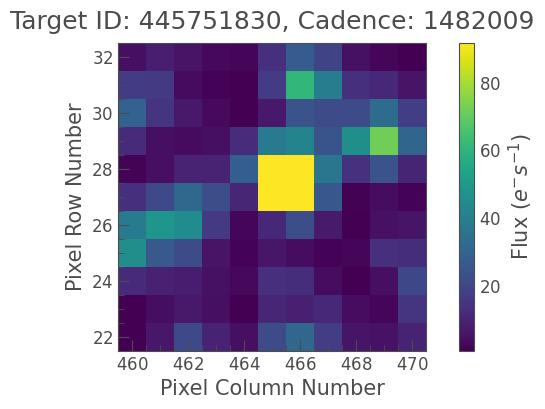

In [5]:
data.plot(frame = 1)

We clearly see the target but we see as well that there are two faint source close to it. We want to extract the light curve of the target object only. Fortunetly, an aperture mask is provided in the file. It can be retreived with

In [6]:
mask = data.pipeline_mask

Let us see what it look like

<Axes: title={'center': 'Target ID: 445751830, Cadence: 1482008'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

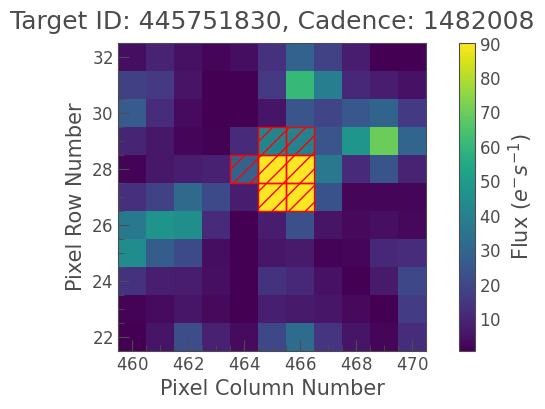

In [7]:
data.plot(aperture_mask = mask)

To extract the light curve, we will only consider pixels that fall in this mask (the red zone). Now the complecated part: extract the light curve! This is very complicated, you should really follow these steps carrefully. Ready ? Let's do this!

In [8]:
lc = data.to_lightcurve(aperture_mask=mask)   # create a raw lightcurve using the mask we extracted earlier

That's it! It was very hard, but we managed to do it! What does it look like?

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

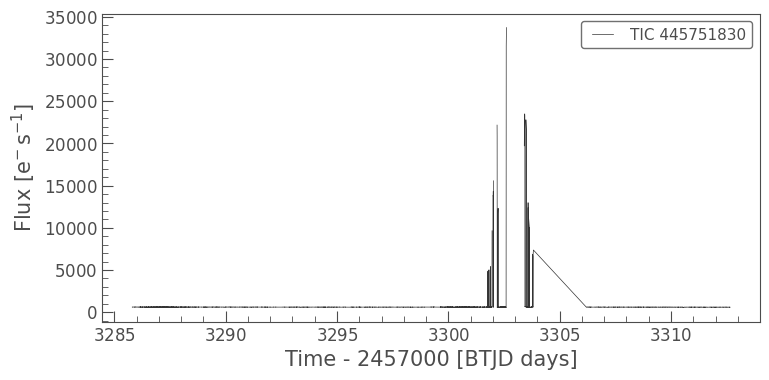

In [9]:
lc.plot()

Well, we need to clean this. Let conserve only data up to 3300 BTJD days

In [36]:
lc = lc[lc.time.jd < 3300]

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

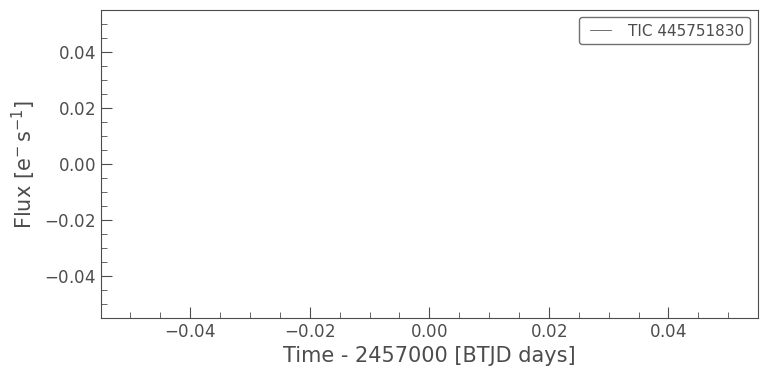

In [37]:
lc.plot()

In [ ]:
lc =lc.remove_nans().remove_outliers(sigma=6)

In [ ]:
lc.plot()

In [ ]:
lc.time

In [ ]:
lc.flux

In [ ]:
lc.plot()

In [ ]:
pg = lc.normalize().to_periodogram(minimum_period=0.2, maximum_period=3)

pg.plot(scale='log');

In [ ]:
period = pg.period_at_max_power
period

In [ ]:
lc.fold(2*period).scatter();